In [ ]:
%matplotlib inline


# Getting the data

In this section, we will dicuss how to get functional data to
use in scikit-fda. We will briefly describe the
:class:`~skfda.representation.grid.FDataGrid` class, which is the type that
scikit-fda uses for storing and working with functional data in discretized
form. We will discuss also how to import functional data from several sources
and show how to fetch and load existing datasets popular in the :term:`FDA`
literature.

.. Disable isort
    isort:skip_file


In [ ]:
# Author: Carlos Ramos Carreño
# License: MIT
#
# sphinx_gallery_thumbnail_number = 6

## The FDataGrid class

In order to use scikit-fda, first we need functional data to analyze.
A common case is to have each functional observation measured at the same
points.
This kind of functional data is easily representable in scikit-fda using
the :class:`~skfda.representation.grid.FDataGrid` class.
The :class:`~skfda.representation.grid.FDataGrid` has two important
attributes: ``data_matrix`` and ``grid_points``.

The attribute ``grid_points`` is a tuple with the same length as the
number of domain dimensions (that is, one for curves, two for surfaces...).
Each of its elements is a 1D numpy :class:`~numpy.ndarray` containing the
grid points for that particular dimension,

\begin{align}((t_1, \ldots, t_{M_i}))_{i=1}^p,\end{align}

where $M_i$ is the number of measurement points for each "argument"
or domain coordinate of the function $i$ and $p$ is the domain
dimension.

The attribute ``data_matrix`` is a
numpy :class:`~numpy.ndarray` containing the measured values of the
functions in the grid spanned by the grid points. For functions
$\{x_i: \mathbb{R}^p \to \mathbb{R}^q\}_{i=1}^N$ this is a tensor
with dimensions $N \times M_1 \times \ldots \times M_p \times q$.



In order to create a :class:`~skfda.representation.grid.FDataGrid`, these
attributes may be provided. The attributes are converted to
:class:`~numpy.ndarray` when necessary.

<div class="alert alert-info"><h4>Note</h4><p>The grid points can be omitted,
    and in that case their number is inferred from the dimensions of
    ``data_matrix`` and they are automatically assigned as equispaced points
    in the unitary cube in the domain set.

    In the common case of functions with domain dimension of 1, the list of
    grid points can be passed directly as ``grid_points``.

    If the codomain dimension is 1, the last dimension of ``data_matrix``
    can be dropped.</p></div>



The following example shows the creation of a
:class:`~skfda.representation.grid.FDataGrid` with two functions (curves)
$\{x_i: \mathbb{R} \to \mathbb{R}\}, i=1,2$ measured at the same
(non-equispaced) points.



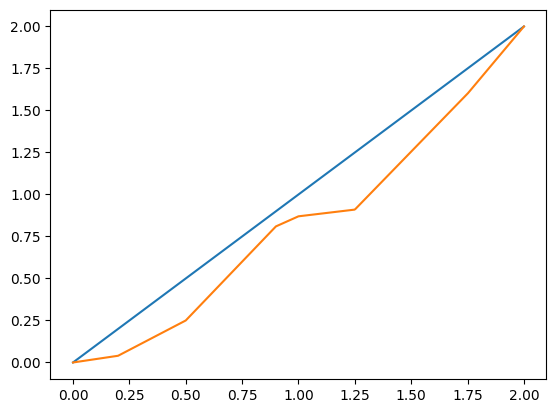

In [2]:
import skfda
import matplotlib.pyplot as plt

grid_points = [0, 0.2, 0.5, 0.9, 1,1.25,1.75,2]  # Grid points of the curves
data_matrix = [
    [0, 0.2, 0.5, 0.9, 1,1.25,1.75,2],     # First observation
    [0, 0.04, 0.25, 0.81,0.87 ,0.91,1.60,2],  # Second observation
]

fd = skfda.FDataGrid(
    data_matrix=data_matrix,
    grid_points=grid_points,
)

fd.plot()
plt.show()

### Advanced example

In order to better understand the FDataGrid structure, you can consider the
following example, in which a :class:`~skfda.representation.grid.FDataGrid`
object is created, containing just one function (vector-valued surface)
$x: \mathbb{R}^2 \to \mathbb{R}^4$.



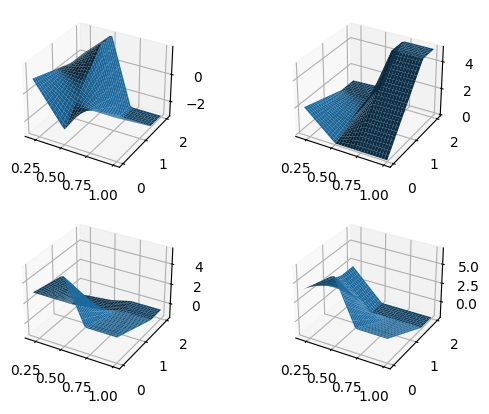

In [13]:
grid_points_surface = [
    [0.2, 0.5, 0.7,1],      # Measurement points in first domain dimension
    [0, 1.5,2],             # Measurement points in second domain dimension
]

data_matrix_surface = [
    # First observation
    [
        # 0.2
        [
            # Value at (0.2, 0)
            [1, 2, 3, 4.1],
            # Value at (0.2, 1.5)
            [0, 1, -1.3, 2],
            [0, 1, -1.3, 2],
        ],
        # 0.5
        [
            # Value at (0.5, 0)
            [-2, 0, 5.5, 7],
            # Value at (0.5, 1.5)
            [2, 1.1, -1, -2],
            [2, 1.1, -1, -2],
        ],
        # 0.7
        [
            # Value at (0.7, 0)
            [0, 0, 1.1, 1],
            # Value at (0.7, 1.5)
            [-3, 5, -0.5, -2],
            [-3, 5, -0.5, -2],
        ],
        # 1
        [
            # Value at (0.7, 0)
            [0, 0, 1.1, 1],
            # Value at (0.7, 1.5)
            [-3, 5, -0.5, -2],
            [-3, 5, -0.5, -2],
        ],
    ],
    # This example has only one observation. Next observations would be
    # added here.
]

fd = skfda.FDataGrid(
    data_matrix=data_matrix_surface,
    grid_points=grid_points_surface,
)

fd.plot()
plt.show()

## Importing data

Usually one does not construct manually the functions, but instead uses
measurements already formatted in a common format, such as comma-separated
values (CSV), attribute-relation file format (ARFF) or Matlab and R formats.

If your data is in one of these formats, you can import it into a numpy
array using the IO functions available in
[Numpy](https://numpy.org/devdocs/reference/routines.io.html) (for simple
text-based or binary formats, such as CSV) or in
[Scipy](https://docs.scipy.org/doc/scipy/reference/io.html) (for Matlab,
Fortran or ARFF files). For importing data in the R format one can also
use the package [RData](https://rdata.readthedocs.io) with is already a
dependency of scikit-fda, as it is used to load the example datasets.



Once your data has been introduced as a :class:`~numpy.ndarray` instance,
you will need to give it the proper dimensions and use it to instantiate
a functional data object.



<div class="alert alert-info"><h4>Note</h4><p>:class:`Pandas DataFrames <pandas.DataFrame>` are also popular as
    datasets containers in the Python scientific ecosystem. If you have
    data in a Pandas DataFrame, you can extract its content as a Numpy
    array using the method :meth:`~pandas.DataFrame.to_numpy` of the
    DataFrame.</p></div>



As an example, we will load the
:func:`digits dataset <sklearn.datasets.load_digits>` of scikit-learn, which
is a preprocessed subset of the MNIST dataset, containing digit images. The
data is already a numpy array. As the data has been flattened into a 1D
vector of pixels, we need to reshape the arrays to their original 8x8 shape.
Then this array can be used to construct the digits as surfaces.



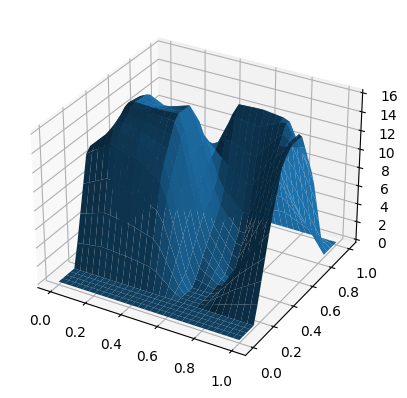

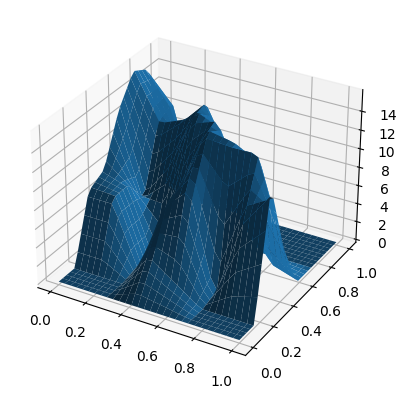

(1797, 8, 8)

In [31]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X = X.reshape(-1, 8, 8)

fd = skfda.FDataGrid(X[:
:,:,:])

# Plot the first 2 observations
fd[5].plot()
fd[7].plot()
plt.show()
X.shape


## Common datasets

scikit-fda can download and import for you several of the most popular
datasets in the :term:`FDA` literature, such as the Berkeley Growth
dataset (function :func:`~skfda.datasets.fetch_growth`) or the Canadian
Weather dataset (function :func:`~skfda.datasets.fetch_weather`). These
datasets are often useful as benchmarks, in order to compare results
between different algorithms, or simply as examples to use in teaching or
research.



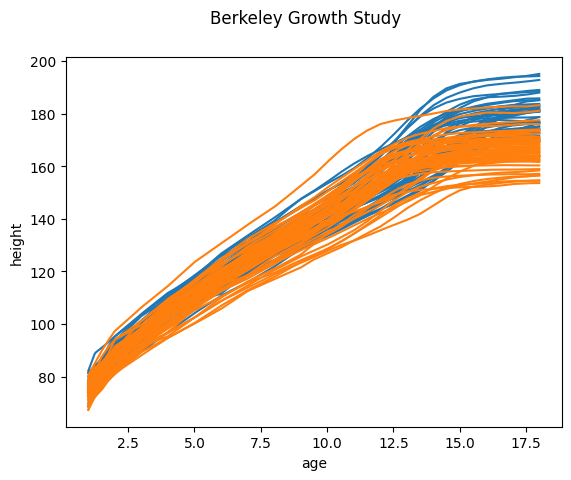

(93,)

In [38]:
X, y = skfda.datasets.fetch_growth(return_X_y=True)
X.plot(group=y)
plt.show()
X.shape

### Datasets from CRAN

If you want to work with a dataset for which no fetching function exist, and
you know that is available inside a R package in the CRAN repository, you
can try using the function :func:`~skfda.datasets.fetch_cran`. This function
will load the package, fetch the dataset and convert it to Python objects
using the packages
[scikit-datasets](https://github.com/daviddiazvico/scikit-datasets) and
[RData](https://rdata.readthedocs.io). As datasets in CRAN follow no
particular structure, you will need to know how it is structured internally
in order to use it properly.



<div class="alert alert-info"><h4>Note</h4><p>Functional data objects from some packages, such as
    [fda.usc](https://cran.r-project.org/web/packages/fda.usc/index.html)
    are automatically recognized as such and converted to
    :class:`~skfda.representation.grid.FDataGrid` instances. This
    behaviour can be disabled or customized to work with more packages.</p></div>



In [62]:
data=skfda.datasets.fetch_cran("pharmacosmoking","asaur")
data


{'pharmacoSmoking':       id  ttr  relapse          grp  age  gender   race employment  \
 1     21  182        0    patchOnly   36    Male  white         ft   
 2    113   14        1    patchOnly   41    Male  white      other   
 3     39    5        1  combination   25  Female  white      other   
 4     80   16        1  combination   54    Male  white         ft   
 5     87    0        1  combination   45    Male  white      other   
 ..   ...  ...      ...          ...  ...     ...    ...        ...   
 121   74   10        1  combination   45  Female  black         ft   
 122   89    0        1  combination   36  Female  black         ft   
 123  108  170        1  combination   39    Male  black         ft   
 124  118   15        1  combination   56  Female  black      other   
 125  128  182        0  combination   50  Female  black         pt   
 
      yearsSmoking levelSmoking ageGroup2 ageGroup4  priorAttempts  \
 1              26        heavy     21-49     35-49      

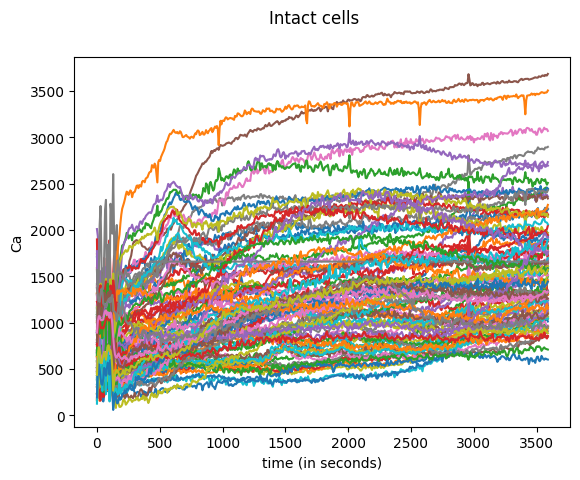

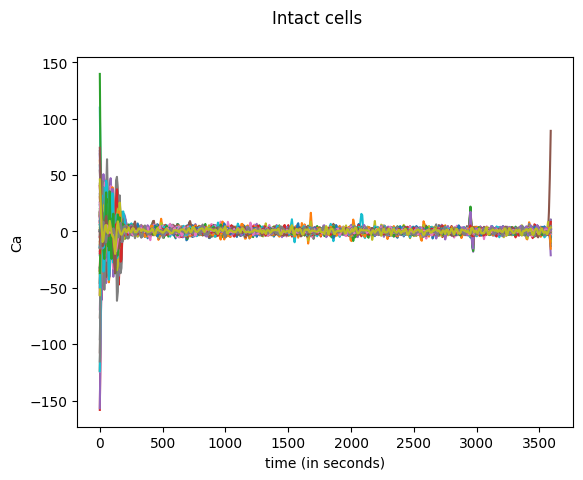

In [71]:
data = skfda.datasets.fetch_cran("MCO", "fda.usc")
X=data["MCO"]["intact"]
X.plot()
X.derivative().plot()
plt.show()


### Datasets from the UEA & UCR Time Series Classification Repository

The [UEA & UCR Time Series Classification Repository](http://www.timeseriesclassification.com/) is a popular repository
for classification problems involving time series data. The datasets used
can be considered also as functional observations, where the functions
involved have domain dimension of 1, and the grid points are
equispaced. Thus, they have also been used in the :term:`FDA` literature.
The original UCR datasets are univariate time series, while the new UEA
datasets incorporate also vector-valued data.
In scikit-fda, the function :func:`~skfda.datasets.fetch_ucr` can be used
to obtain both kinds of datasets as
:class:`~skfda.representation.grid.FDataGrid` instances.



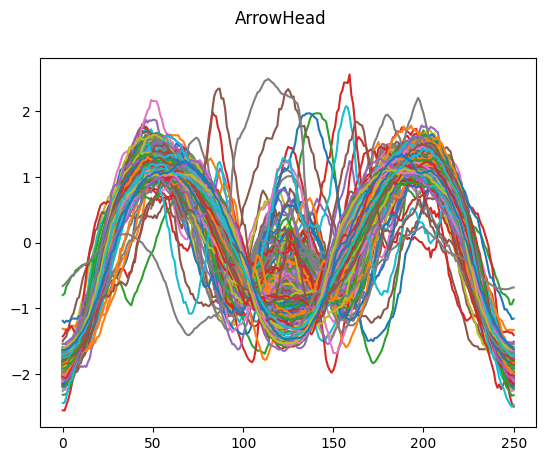

In [72]:
# Load ArrowHead dataset from UCR
dataset = skfda.datasets.fetch_ucr("ArrowHead")
dataset["data"].plot()
plt.show()

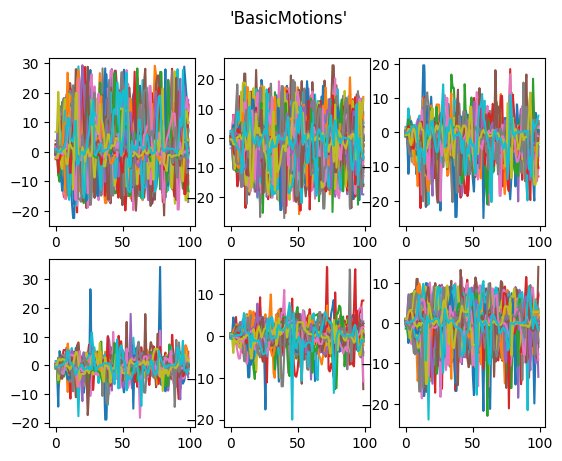

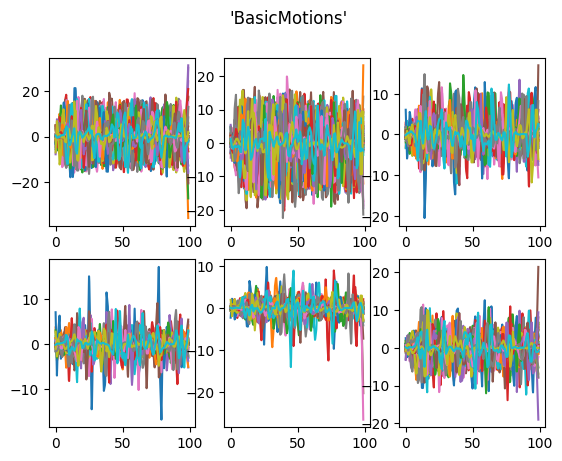

In [74]:
# Load BasicMotions dataset from UEA
dataset = skfda.datasets.fetch_ucr("BasicMotions")
dataset["data"].plot()
dataset["data"].derivative().plot()
plt.show()

## Synthetic data

Sometimes it is not enough to have real-world data at your disposal.
Perhaps the messy nature of real-world data makes difficult to detect when
a particular algorithm has a strange behaviour. Perhaps you want to see how
it performs under a simplified model. Maybe you want to see what happens
when your data has particular characteristics, for which no dataset is
available. Or maybe you only want to illustrate a concept without having
to introduce a particular set of data.

In those cases, the ability to use generated data is desirable. To aid this
use case, scikit-learn provides several functions that generate data
according to some model. These functions are in the
:doc:`datasets </modules/datasets>` module and have the prefix ``make_``.
Maybe the most useful of those are the functions
:func:`skfda.datasets.make_gaussian_process` and
:func:`skfda.datasets.make_gaussian` which can be used to generate Gaussian
processes and Gaussian fields with different covariance functions.



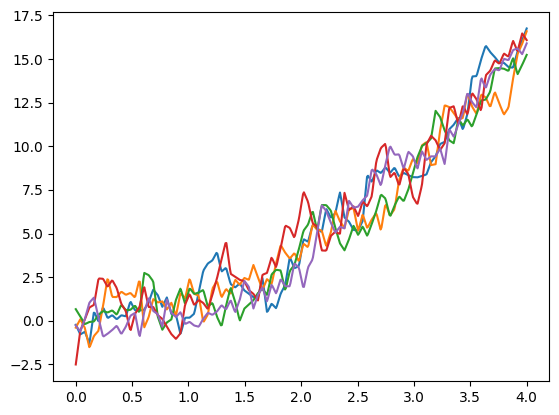

In [75]:
import numpy as np

cov = skfda.misc.covariances.Exponential(length_scale=0.1)

fd = skfda.datasets.make_gaussian_process(
    start=0,
    stop=4,
    n_samples=5,
    n_features=100,
    mean=lambda t: np.power(t, 2),
    cov=cov,
)

fd.plot()
plt.show()

In order to know all the available functionalities to load existing and
synthetic datasets it is recommended to look at the documentation of the
:doc:`datasets </modules/datasets>` module.

